<a href="https://colab.research.google.com/github/Vorobivan/my_projects/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B8%D0%BD%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Исследование мировой киноиндустрии 1986-2020

**Введение**

Умирает ли киноиндустрия? Является ли Netflix новым видом развлечений? Это были первые вопросы, которые побудили меня создать набор данных, сосредоточенный на доходах от фильмов, и проанализировать его за последние десятилетия. Но зачем на этом останавливаться? Есть больше факторов, которые влияют на такого рода вещи, таких как актеры, жанры, рейтинги пользователей и многое другое. И теперь любой, у кого есть опыт (вы), может задать конкретные вопросы о киноиндустрии и получить ответы.

В наборе данных 7668 фильмов (1986-2020). Каждый фильм имеет следующие атрибуты:

- budget: бюджет фильма;
- company: производственная компания;
- country: страна производства;
- director: режиссер;
- genre: жанр фильма;
- gross: доход от фильма;
- name: название фильма;
- rating: возрастной рейтинг;
- released: дата релиза;
- runtime: продолжительность фильма;
- score: рейтинг IMDb;
- votes: количество голосов пользователей;
- star: актер\актриса, которые исполнили главную роль;
- writer: автор фильма;
- year: год релиза.

In [ ]:
# загрузим все необходимые для работы библиотеки

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 


In [ ]:
# загрузим файл

from google.colab import files

data = files.upload()

Saving movies.csv to movies.csv


##Предобработка данных

In [ ]:
# загрузим датафрейм и изучим информацию о нем

df = pd.read_csv('movies.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Всего в датафрейме 7668 строк. 

Столбцы  rating, released, score,votes, writer, star, country,budget, gross, company, runtime имеют пропуски.

In [ ]:
# выведем информацию о пропусках

pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
rating,1.000000
genre,0.000000
year,0.000000
released,0.000000
score,0.000000
votes,0.000000
director,0.000000
writer,0.000000
star,0.000000


Больше всего пропусков в столбце budget. Остальные столбцы имеют незначительное число пропусков.

Проверим датафрейм на явные дубликаты.

In [ ]:
df.duplicated().sum()



0

Дубликатов в датафрейме не обнаружено.

In [ ]:
# изучим уникальные названия столбцов

df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [ ]:
#изучим столбец rating и составим рейтинг его уникальных значений

df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

Всего в датафрейме 

В столбце rating представлены рейтинги Системs рейтингов Американской киноассоциации по ограничению возраста и Системы оценки телевизионного контента.

Б**о**льшая часть фильмов имеет рейтинг R

Справочник о значения рейтинга:

- Рейтинг R - лица, не достигшие 17-летнего возраста, допускаются на фильм только в сопровождении одного из родителей, либо законного представителя

- PG-13 - Просмотр не желателен детям до 13 лет. 

- PG - Детям рекомендуется смотреть фильм с родителями.  

- G - фильм демонстрируется без ограничений.

- NC-17 - лица 17-летнего возраста и младше на фильм не допускаются. 

- TV-MA - программа для просмотра взрослыми

- TV-PG - программа могут быть неподходящими для детей младшего возраста

- X - фильмы с контентом, неподходящим для детей

- Approved - фильм был одобрен к показу.

- TV-14 - программа содержит некоторые материалы, которые многие родители сочли бы неподходящими для детей младше 14 лет

Избавимся от неявных дубликатов в столбце rating, таких как Unrated и Not rated.

Заменим пропуски значением No rating

In [ ]:
df['rating'] = df['rating'].replace('Unrated', 'No rating') 
df['rating'] = df['rating'].replace('Not Rated', 'No rating') 
df['rating'] = df['rating'].replace('no rating', 'No rating') 

df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
No rating     335
G             153
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

Изменим тип данных в столбцах gross, budget, runtime и votes.

In [ ]:
df['gross'] = df['gross'].astype('Int64')
df['budget'] = df['budget'].astype('Int64')
df['runtime'] = df['runtime'].astype('Int64')
df['votes'] = df['votes'].astype('Int64')


In [ ]:
# заменим пропуски в столбце budget на 0

df['budget'] = df['budget'].fillna(0)


In [ ]:
# заменим пропуски в столбце gross на 0

df['gross'] = df['gross'].fillna(0)

# Исследовательский анализ данных

## Кассовые сборы

In [ ]:
# изучим описательную статистику столбца gross

df['gross'].describe()

count    7.479000e+03
mean     7.850054e+07
std      1.657251e+08
min      3.090000e+02
25%      4.532056e+06
50%      2.020576e+07
75%      7.601669e+07
max      2.847246e+09
Name: gross, dtype: float64

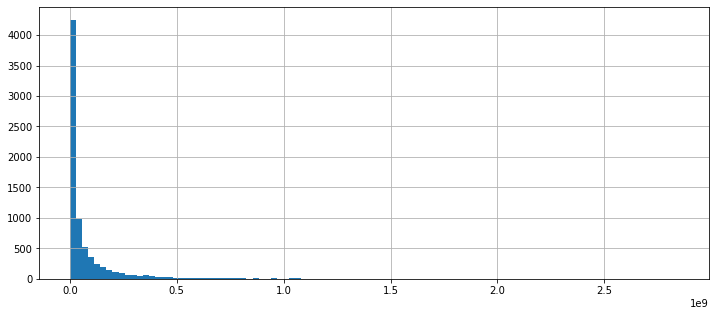

In [ ]:
# построим гистограмму столбца gross

df['gross'].hist(bins=100, figsize = (12,5))

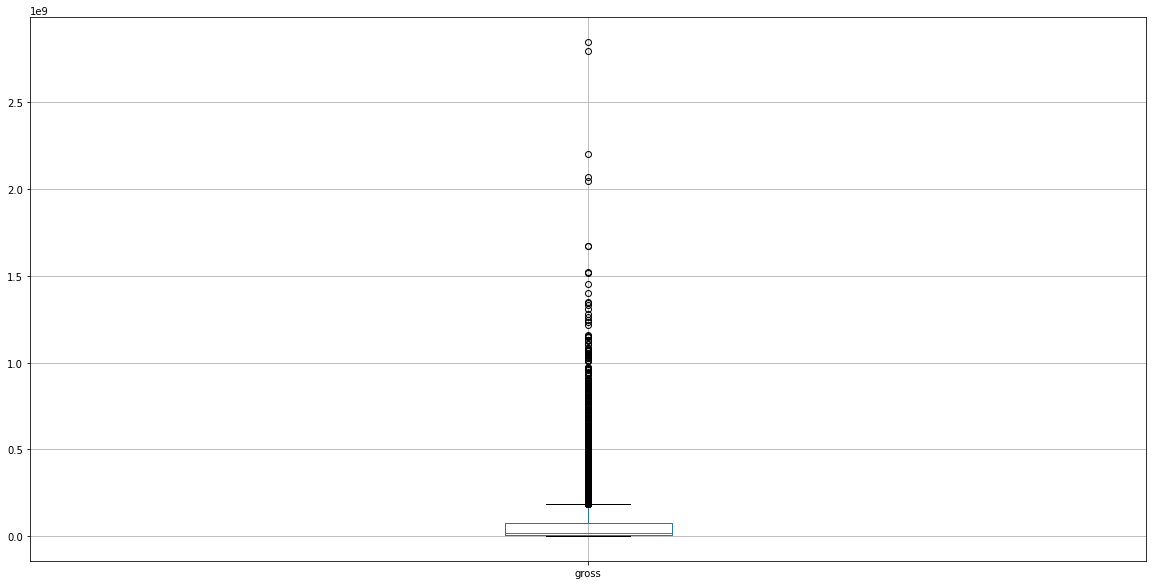

In [ ]:
# построим "ящик с усами", чтобы изучить распределение данных по кассовым сборам

df.boxplot('gross', figsize=(20, 10))

В столбце кассовых сборов много выбросов, что свидетельсвует о наличии большого числа блокбастеров, чьи продажи превосходят все остальные тайтлы.

Удалять их не нужно, потому что такая ситуация типична для всех творческих индустрий.

In [ ]:
# выведем топ-15 самых кассовых фильмов за весь период датафрейма


df_top_movies = df.sort_values(by='gross', ascending=False).head(15)
df_top_movies = df_top_movies[['name', 'year', 'genre', 'gross']].reset_index(drop=True)
df_top_movies

,name,year,genre,gross
0,Avatar,2009,Action,2.847246e+09
1,Avengers: Endgame,2019,Action,2.797501e+09
2,Titanic,1997,Drama,2.201647e+09
3,Star Wars: Episode VII - The Force Awakens,2015,Action,2.069522e+09
4,Avengers: Infinity War,2018,Action,2.048360e+09
5,The Lion King,2019,Animation,1.670728e+09
6,Jurassic World,2015,Action,1.670516e+09
7,The Avengers,2012,Action,1.518816e+09
8,Furious 7,2015,Action,1.515341e+09
9,Frozen II,2019,Animation,1.450027e+09


Лидер рейтинга - "Аватар" с общим доходом в 2,8 млрд долл.
На втором месте - "Мстители". Их сборы составили 2,7 млрд долл.
На третьем месте - "Титаник". Его доход составил 2,2 млрд долл.

Text(0.5, 1.0, 'Кассовые сборы по годам')

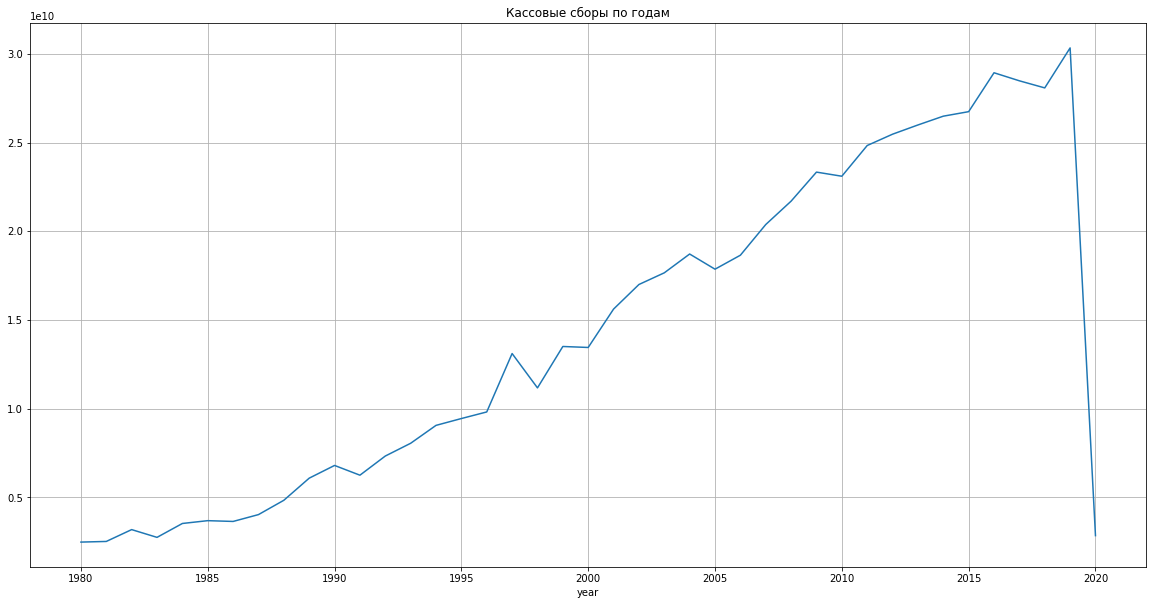

In [ ]:
#построим график кассовых сборов по годам за период 1986-2020

df.groupby('year')['gross'].sum().plot(grid=True, figsize=(20,10))
plt.title('Кассовые сборы по годам')


Кассовые сборы фильмов стабильно растут на протяжении всего периода. В 2020 они обваливаются по причине мирового локдауна, связанного с пандемией коронавируса.

По всему миру были закрыты кинотеатры, были отменены или отложены кинофестивали, а выпуски фильмов перенесены на будущие даты или на неопределённый срок.

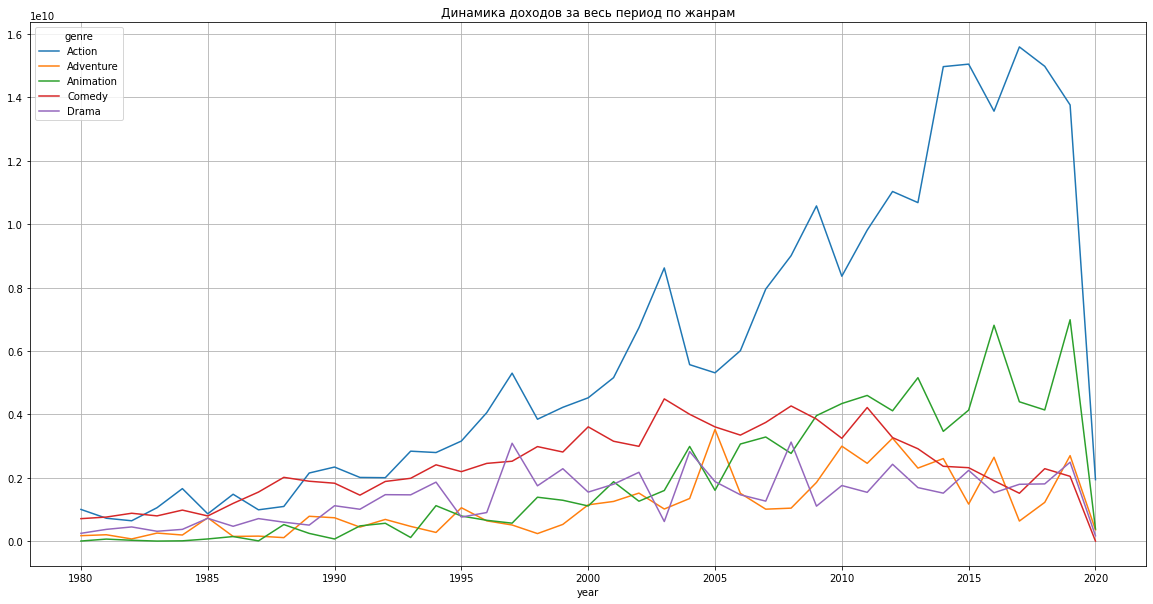

In [ ]:
# cгруппируем данные по годам и доходам в разбивке по топ-5 самым прибыльным жанрам за весь период

df_gross_genre = df.groupby('genre')['gross'].sum().sort_values(ascending=False).head()

df_top_genre = df.query('genre in @df_gross_genre.index').pivot_table(index='year', columns='genre', values='gross', aggfunc='sum')
df_top_genre.plot(figsize=(20,10), grid=True, title='Динамика доходов за весь период по жанрам')



In [ ]:
#построим сводную таблицу самых прибыльных жанров с 2015 года

df_gross_top = df.loc[df['gross'] > 1].query("year > 2015").groupby('genre').agg({'gross':sum}).sort_values(by='gross', ascending=False)
df_gross_top['share, %'] = round((df_gross_top['gross'] / df_gross_top['gross'].sum())*100,2)
df_gross_top

,gross,"share, %"
genre,,
Action,5.985226e+10,50.42
Animation,2.271577e+10,19.14
Drama,7.782836e+09,6.56
Comedy,7.746264e+09,6.53
Adventure,7.554550e+09,6.36
Biography,4.800380e+09,4.04
Horror,3.995665e+09,3.37
Crime,2.912837e+09,2.45
Family,1.264455e+09,1.07


Самый прибыльный жанр за период с 2015 года - Action. Его доля составляет 50% от общих доходов. На втором месте - Анимация. Его доля - 19%. 

## Бюджет

Text(0.5, 1.0, 'Бюджет фильмов по годам')

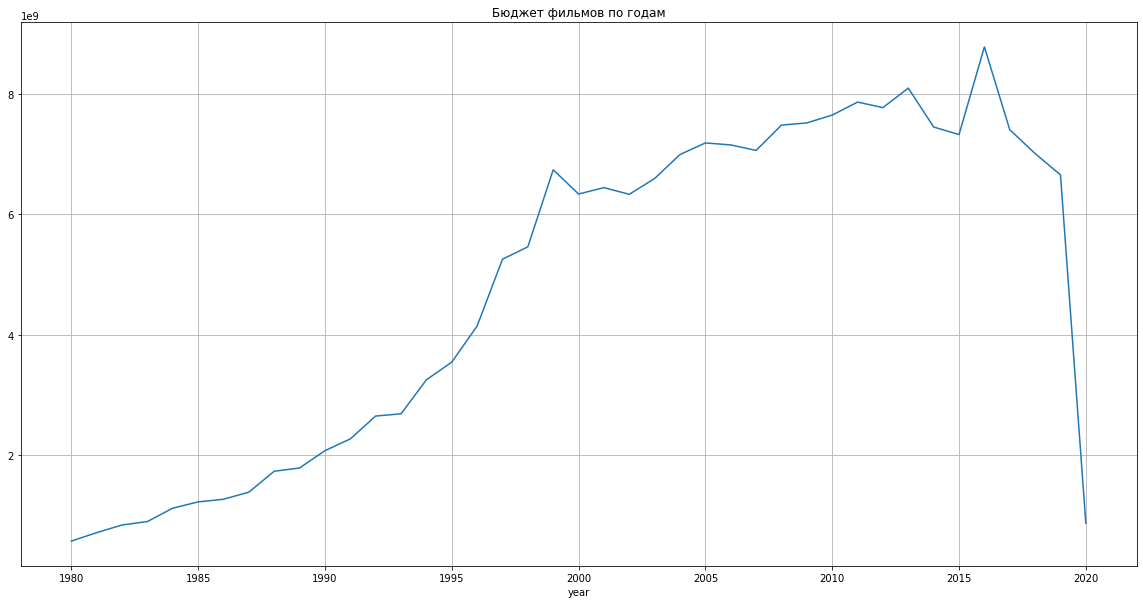

In [ ]:
#построим график бюджета по годам за период 1986-2020


df_gross = df.groupby('year')['budget'].sum().plot(grid=True, figsize=(20,10))
plt.title('Бюджет фильмов по годам')

Text(0.5, 1.0, 'Корреляция между бюджетом производства и продаж')

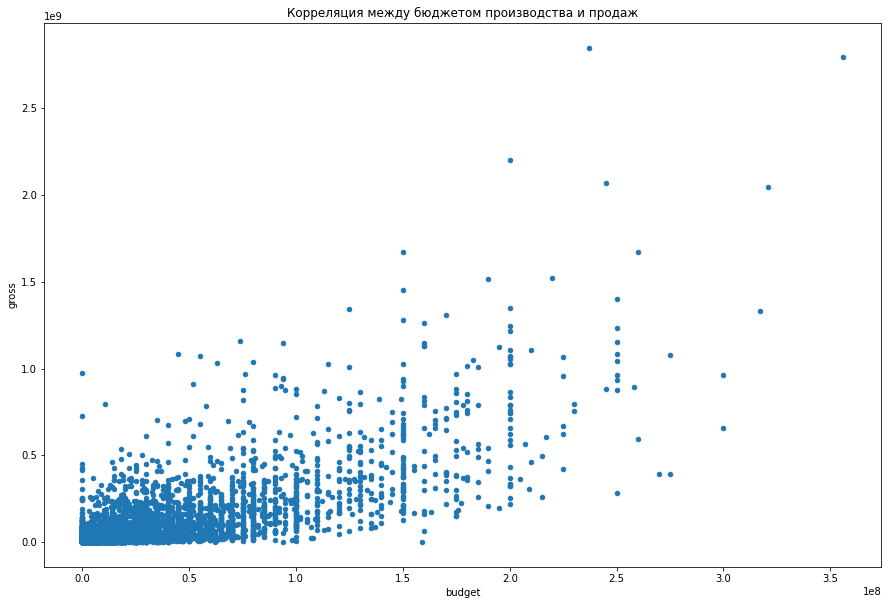

In [ ]:
#построим диаграмму рассеяния для бюджета производства и продаж 

df.plot(x='budget', y='gross', kind='scatter', figsize=(15,10))
plt.title('Корреляция между бюджетом производства и продаж')

In [ ]:
# построим таблицу корреляций для всего датафрейма

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.630757,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.748719,0.269510
gross,0.257486,0.186258,0.630757,0.748719,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.269510,0.245216,1.000000


Отметим относительно высокую корреляцию между

## Фильмы

Топ фильмов по бюджету

In [ ]:
#составим рейтинг топ-15 фильмов по бюджету на производство за весь период

df_films_budget = df.sort_values(by='budget',ascending=False).head(15).reset_index()
df_films_budget  = df_films_budget[['name', 'released', 'budget']]
df_films_budget

,name,released,budget
0,Avengers: Endgame,"April 26, 2019 (United States)",356000000
1,Avengers: Infinity War,"April 27, 2018 (United States)",321000000
2,Star Wars: Episode VIII - The Last Jedi,"December 15, 2017 (United States)",317000000
3,Pirates of the Caribbean: at World's End,"May 25, 2007 (United States)",300000000
4,Justice League,"November 17, 2017 (United States)",300000000
5,Solo: A Star Wars Story,"May 25, 2018 (United States)",275000000
6,Star Wars: Episode IX - The Rise of Skywalker,"December 20, 2019 (United States)",275000000
7,Superman Returns,"June 28, 2006 (United States)",270000000
8,Tangled,"November 24, 2010 (United States)",260000000
9,The Lion King,"July 19, 2019 (United States)",260000000


Топ фильмов по кассовым сборам

In [ ]:
#составим рейтинг топ-15 фильмов по кассовым сборам за весь период

df_films_gross = df.sort_values(by='gross',ascending=False).head(15).reset_index()
df_films_gross  = df_films_gross[['name', 'released', 'gross']]
df_films_gross

,name,released,gross
0,Avatar,"December 18, 2009 (United States)",2847246203
1,Avengers: Endgame,"April 26, 2019 (United States)",2797501328
2,Titanic,"December 19, 1997 (United States)",2201647264
3,Star Wars: Episode VII - The Force Awakens,"December 18, 2015 (United States)",2069521700
4,Avengers: Infinity War,"April 27, 2018 (United States)",2048359754
5,The Lion King,"July 19, 2019 (United States)",1670727580
6,Jurassic World,"June 12, 2015 (United States)",1670516444
7,The Avengers,"May 4, 2012 (United States)",1518815515
8,Furious 7,"April 3, 2015 (United States)",1515341399
9,Frozen II,"November 22, 2019 (United States)",1450026933


In [ ]:
# выведем топ-10 наименее прибыльных фильмов

df_gr = df.loc[df['gross'] > 0]
df_gr.sort_values(by='gross').reset_index().head(10)



,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85
1,2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134
2,7580,Run with the Hunted,No rating,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,0,682,Roxwell Films,93
3,7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,0,790,Visual Arts Entertainment,104
4,3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,0,1400,British Broadcasting Corporation (BBC),103
5,2906,Pusher,No rating,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,0,1605,Balboa Entertainment,110
6,3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,0,1672,Polygram Filmed Entertainment,87
7,5524,Now & Later,No rating,Drama,2009,"February 18, 2011 (United States)",5.1,1600,Philippe Diaz,Philippe Diaz,Keller Wortham,United States,0,1808,Cinema Libre Studio,99
8,6030,Angels Crest,R,Drama,2011,"December 30, 2011 (United States)",5.8,1900,Gaby Dellal,Leslie Schwartz,Thomas Dekker,Canada,0,2037,Process Film,92
9,272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


Text(0.5, 1.0, 'Топ-15 фильмов по кассовым сборам')

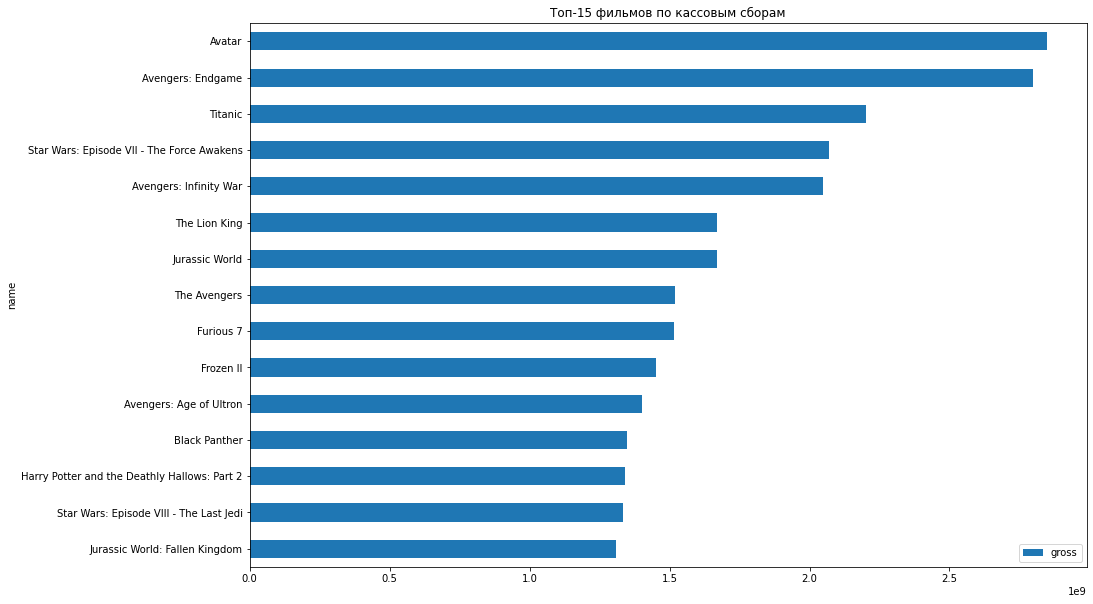

In [ ]:
df_films_gross.sort_values(by='gross', ascending=True).plot(x='name', kind='barh', figsize=(15,10))
plt.title('Топ-15 фильмов по кассовым сборам')

## Жанры

Сгруппируем данные по годам и доходам в разбивке по разным жанрам

## Страны

## Студии

In [ ]:
# cгруппируем данные по доходам каждой студии и выведем топ-10 компаний

df_studio_top = df.loc[df['gross'] > 0].groupby('company').agg({'gross':'sum'}).sort_values(by = 'gross', ascending =False)
df_studio_top['share, %'] = round((df_studio_top['gross'] / df_studio_top['gross'].sum())*100,2)

print('Всего студий в датафрейме:', len(df['company']))
df_studio_top = df_studio_top.head(10)
df_studio_top

Всего студий в датафрейме: 7668


,gross,"share, %"
company,,
Warner Bros.,5.649142e+10,9.62
Universal Pictures,5.251419e+10,8.95
Columbia Pictures,4.300894e+10,7.33
Paramount Pictures,4.049361e+10,6.90
Twentieth Century Fox,4.025705e+10,6.86
Walt Disney Pictures,3.632789e+10,6.19
New Line Cinema,1.988380e+10,3.39
Marvel Studios,1.506559e+10,2.57
DreamWorks Animation,1.187361e+10,2.02


Среди доходов студий за весь период с 1986 года лидирует Warner Bros., которая собрала 56,4 млрд долл - почти 10% от дохода всех студий. На втором месте - Universal Pictures с доходом в 52,5 млрд долл. 

Отметим, что на рынке студий нет компаний, которые занимали бы существенную долю рынка. Всего в датафрейме 7668 студий, а лидер рейтинга занимает 10% рынка, из чего можно сделать вывод, что этот рынок является конкурентным. 

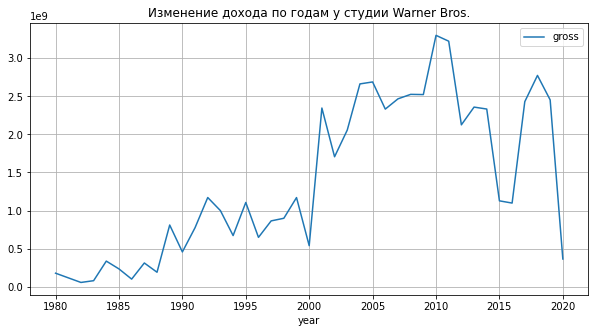

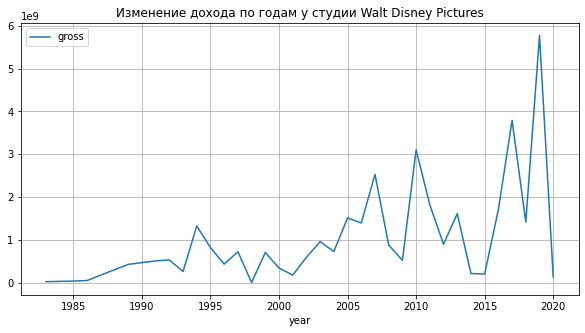

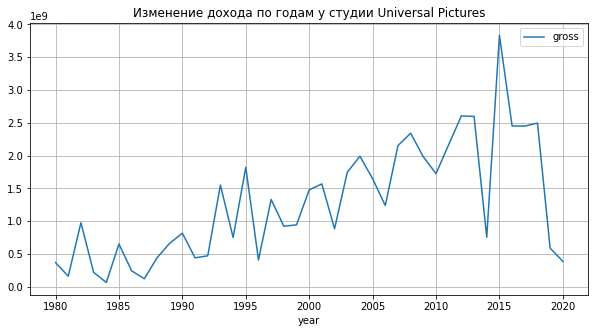

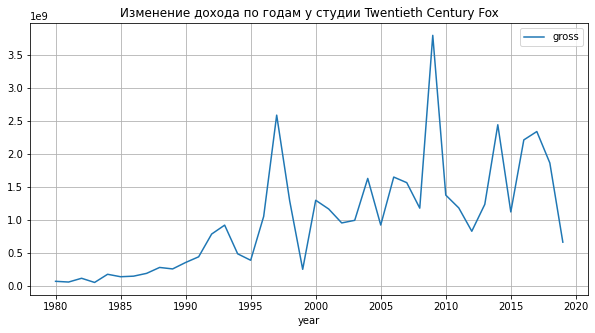

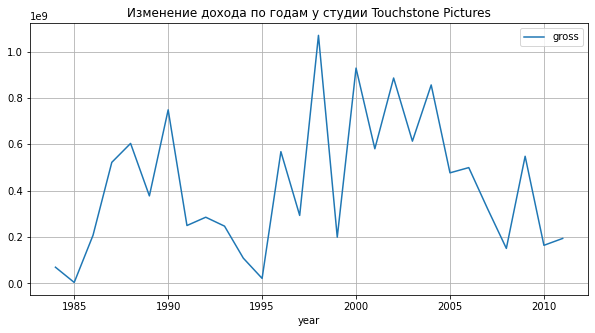

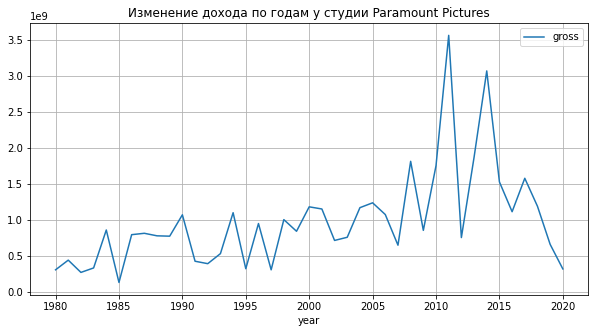

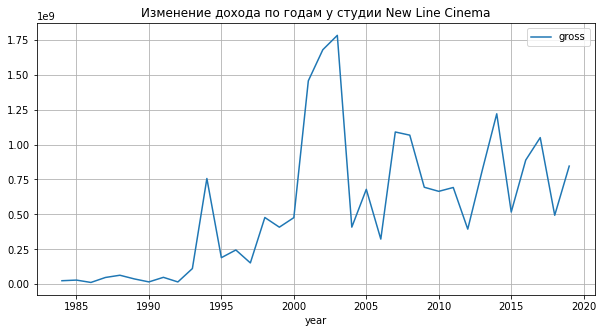

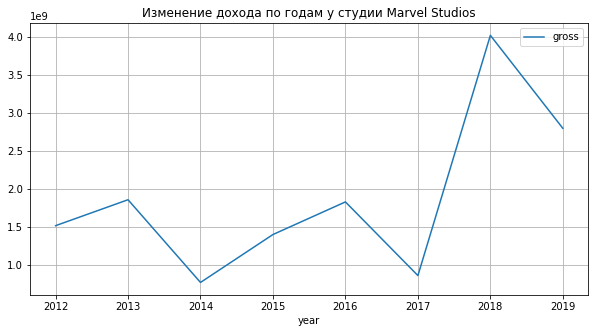

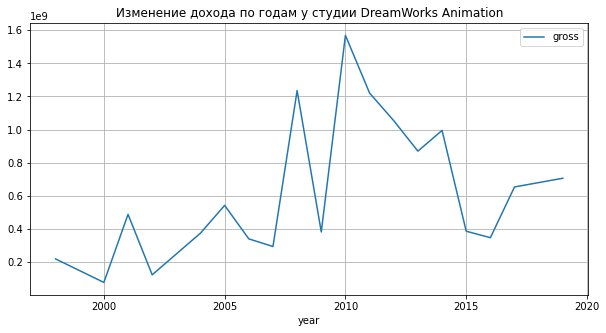

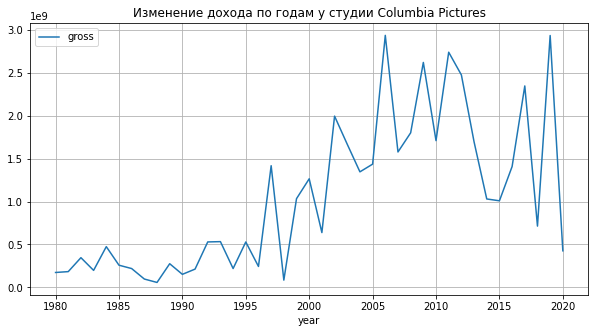

In [ ]:
#построим графики дохода по годам для студий из рейтинга топ-10


df_studio_dymamic = df.loc[df['gross'] > 0]


df_studio_dymamic = df_studio_dymamic.groupby(['company', 'year']).agg({'gross':'sum'}).sort_values(by = ['company','year'], ascending =False).reset_index()


for name in df_studio_dymamic['company'].unique():
  if name in df_studio_top.index:
    df_studio_dymamic[df_studio_dymamic['company'] == name].plot(x='year', y='gross', grid=True, figsize=(10,5))
    plt.title(f'Изменение дохода по годам у студии {name}')



## Рейтинг IMBD

Text(0.5, 1.0, 'Диаграмма рассеяния для рейтинга IMBD и продаж ')

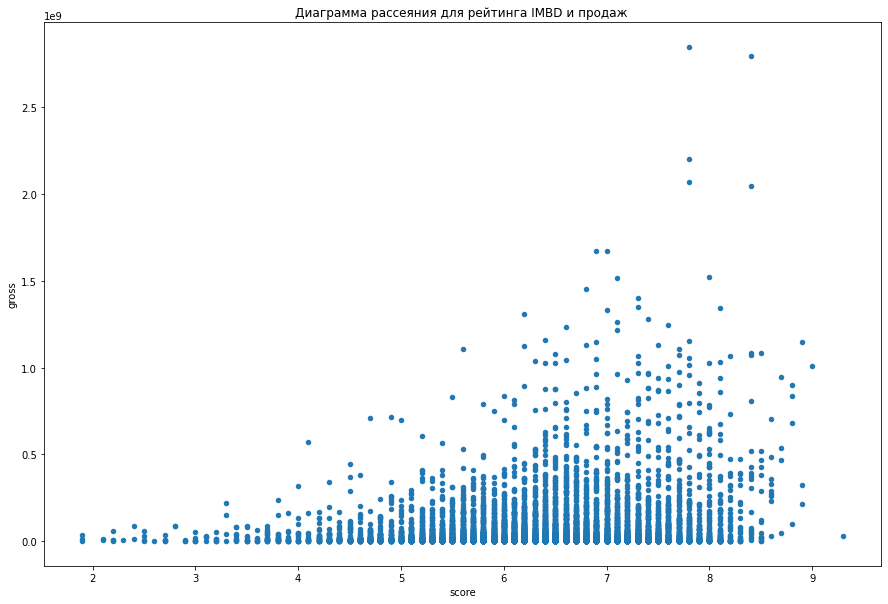

In [ ]:
#построим диаграмму рассеяния для рейтинга IMBD и продаж 

df.plot(x='score', y='gross', kind='scatter', figsize=(15,10))
plt.title('Диаграмма рассеяния для рейтинга IMBD и продаж ')



In [ ]:
df_country = df.pivot_table(index='country', values = 'gross', aggfunc = 'sum').sort_values(by='gross',ascending=False).head(10)
df_country['share, %'] = (df_country['gross'] / df_country['gross'].sum())*100
df_country


,gross,"share, %"
country,,
United States,483458762880,83.834536
United Kingdom,48950197427,8.488246
China,8789429801,1.524138
France,8499480043,1.473859
New Zealand,6354731946,1.101947
Germany,6218590787,1.078339
Canada,6075291696,1.053491
Japan,3668029755,0.636058
Australia,3008909112,0.521762


In [ ]:
df['gross']

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7663         <NA>
7664         <NA>
7665         <NA>
7666         <NA>
7667         <NA>
Name: gross, Length: 7668, dtype: Int64

In [ ]:
# разобьем доход (gross) по категориям. 25%-му процентилю присвоим категорию "Низкий доход", 
# доходу, находящемуся в межквартильном размахе, присвоим категорию "Средний доход". Доходу, который превышает 75%-й процентиль - "Высокий доход". 

# вычислим процентили и присвоим им переменные
quantile_75 = df['gross'].quantile(q=0.75)
quantile_25 = df['gross'].quantile(q=0.25)


# напишем функцию
def categorize(row):
  gr = row['gross']
  if gr >= quantile_75:
    return 'Высокий доход'
  if (gr < quantile_75 ) & (gr >= quantile_25):
    return 'Средний доход'
  if (gr < quantile_25) & (gr > 0):
    return 'Низкий доход'
  else:
    return 'Нет информации о доходе'

df['gross_category'] = df.apply(categorize, axis=1)

df



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_category
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146,Средний доход
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104,Средний доход
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124,Высокий доход
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88,Высокий доход
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98,Средний доход
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0.0,NaN,90,Нет информации о доходе
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0.0,Cactus Blue Entertainment,90,Нет информации о доходе
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0.0,Embi Productions,<NA>,Нет информации о доходе
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000,0.0,NaN,120,Нет информации о доходе


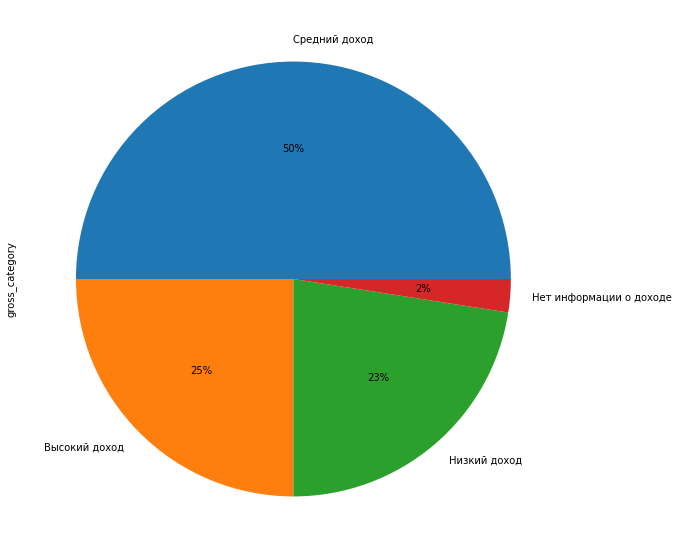

In [ ]:
df['gross_category'].value_counts().plot(kind='pie',figsize=(10,10), autopct='%1.0f%%')

In [ ]:
# вычислим средние оценки IMBD для трех категорий



